In [52]:
import numpy as np
from plotnine import *
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


In [53]:
hospital_charge = pd.read_csv("hospital_charge.csv")

Distributions and Outliers

Read in the data and plot histograms/densities or scatter plots for each of the following. Make sure to label the axis of the plots appropriately.

(a) Total Discharges

(b) Average Covered Charges

(c) Average Total Payments vs. Average Medicare Payments 

(d) Average Covered Charges vs. Average Medicare Payments

In each plot, identify at least one outlier and discuss whether the outlier(s) are surprising or expected given the location of the Provider.

In [57]:
hospital_charge.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [56]:
series = hospital_charge[' Total Discharges '].value_counts()
df = pd.DataFrame({'Total Discharges':series.index, 'Frequency':series.values})

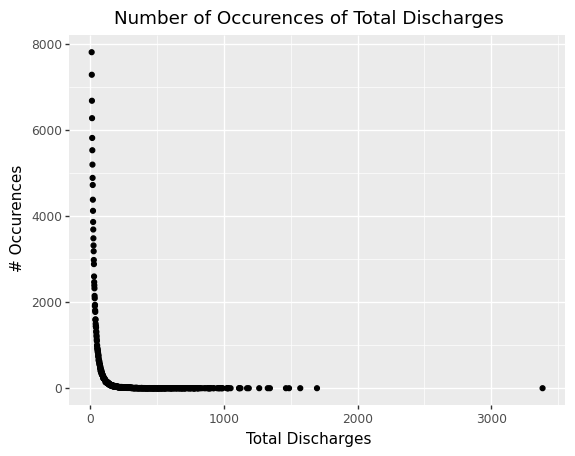

<ggplot: (-9223372036542487934)>

In [5]:
ggplot(df, aes(x= 'Total Discharges' ,y='Frequency' )) + geom_point() \
    + labs(title = "Number of Occurences of Total Discharges", y = "# Occurences")

Plotting the occurences of the total number of discharges in each hospital shows the data following a pareto distribution. There is one data point way on the high end of the x value.

In [6]:
df.sort_values(by=['Total Discharges']).tail(5)

,Total Discharges,Frequency
543,1464,1
559,1487,1
611,1571,1
591,1696,1
547,3383,1


That outlier is a single frequency of 3383 total discharges.

In [7]:
hospital_charge.loc[hospital_charge[' Total Discharges '] == 3383]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
112969,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,$53113.58,$19023.70,$14880.39


Looking into the outlier, it seems to be be a hospital in New York performing joint replacement surgery. I will refrain from making any hypothesis based on this outlier alone due to lack of observing patterns based on similar outliers.

The fact that it's in New York, a densely populated area, would make sense though.

______________________________________________________________________________________________________________________

(b) Average Covered Charges

In [8]:
#get rid of "$" sign
hospital_charge[' Average Covered Charges '] = hospital_charge[' Average Covered Charges '].str[1:]

In [9]:
#change column to float type
hospital_charge[' Average Covered Charges '] = hospital_charge[' Average Covered Charges '].astype(float)
#hospital_charge[' Average Covered Charges ']

In [10]:
series = hospital_charge[' Average Covered Charges '].value_counts()
df = pd.DataFrame({' Average Covered Charges ':series.index, 'Frequency':series.values})

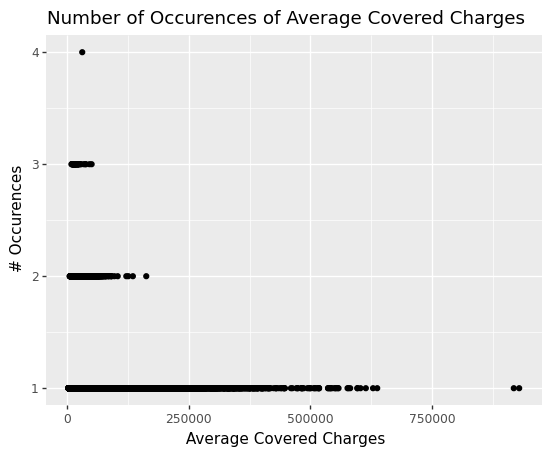

<ggplot: (307383893)>

In [11]:
ggplot(df, aes(x= ' Average Covered Charges ' ,y='Frequency' )) + geom_point() \
    + labs(title = "Number of Occurences of Average Covered Charges", y = "# Occurences")

This doesn't look very good, as we're trying to find out where most of the charges come from, it looks like from the plot above that most of them are less than 500,000, but the points look so clustered that it's hard to tell how many of them are there. Let's instead throw it into a historgram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128b63160>]],
      dtype=object)

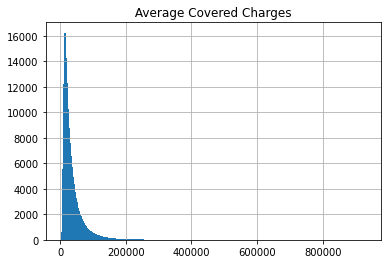

In [12]:
hospital_charge.hist(column= ' Average Covered Charges ', bins = 300)

Indeed, most of them look to be below 100,000. But if we're trying to look at the outliers, we should still look at the previous plot.

Plotting the raw data reveals 2 charges of abnormally high value. Let's take a look at those:

In [13]:
df.sort_values(by=[' Average Covered Charges ']).tail(5)

,Average Covered Charges,Frequency
105684,613926.60,1
96220,628730.40,1
7443,637377.71,1
70039,918023.18,1
75748,929118.90,1


In [14]:
hospital_charge.loc[hospital_charge[' Average Covered Charges '] == 918023.18]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
39529,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50195,WASHINGTON HOSPITAL,2000 MOWRY AVE,FREMONT,CA,94538,CA - Alameda County,11,918023.18,$119113.00,$113462.09


In [15]:
hospital_charge.loc[hospital_charge[' Average Covered Charges '] == 929118.90 ]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
39562,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,11,929118.9,$156158.18,$154620.81


Both are from the Bay Area of California, both are respiratory related, both have 11 total discharges each. It almost looks like they're related.

In [16]:
hospital_charge.loc[hospital_charge[' Average Covered Charges '] == 637377.71]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
151394,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,14,637377.71,$109945.57,$109303.21


In [17]:
hospital_charge.loc[hospital_charge[' Average Covered Charges '] == 628730.40]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
151384,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,50367,NORTHBAY MEDICAL CENTER,1200 B GALE WILSON BLVD,FAIRFIELD,CA,94533,CA - Contra Costa County,20,628730.4,$84617.90,$83534.65


In [18]:
hospital_charge.loc[hospital_charge[' Average Covered Charges '] == 613926.60]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
40336,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,390027,TEMPLE UNIVERSITY HOSPITAL,3401 NORTH BROAD STREET,PHILADELPHIA,PA,19140,PA - Philadelphia,28,613926.6,$80549.67,$67498.00


4 of the 5 hospitals with highest average covered charges are in California. Maybe this is due to both the higher medicare payouts and that the services are more expensive.

______________________________________________________________________________________________________________________

(c) Average Total Payments vs. Average Medicare Payments 

In [19]:
#get rid of "$" sign
hospital_charge[' Average Total Payments '] = hospital_charge[' Average Total Payments '].str[1:]
hospital_charge['Average Medicare Payments'] = hospital_charge['Average Medicare Payments'].str[1:]

#change column to float type
hospital_charge[' Average Total Payments '] = hospital_charge[' Average Total Payments '].astype(float)
hospital_charge['Average Medicare Payments'] = hospital_charge['Average Medicare Payments'].astype(float)

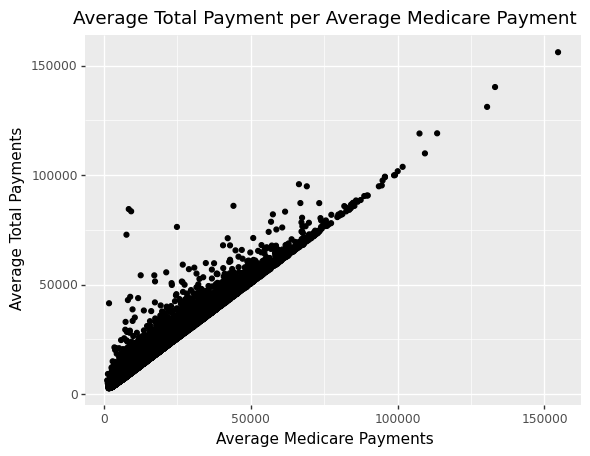

<ggplot: (307102605)>

In [20]:
ggplot(hospital_charge, aes(x= 'Average Medicare Payments' ,y=' Average Total Payments ' )) + geom_point() \
    + labs(title = "Average Total Payment per Average Medicare Payment")

Looking at the ATP vs AMP, 2 points on the left hand side near (10000,85000) stand out. Let's take a look at the ratio for a more accurate analysis:

In [21]:
hospital_charge['Total/Medicare'] = hospital_charge[' Average Total Payments '] / hospital_charge['Average Medicare Payments'] 

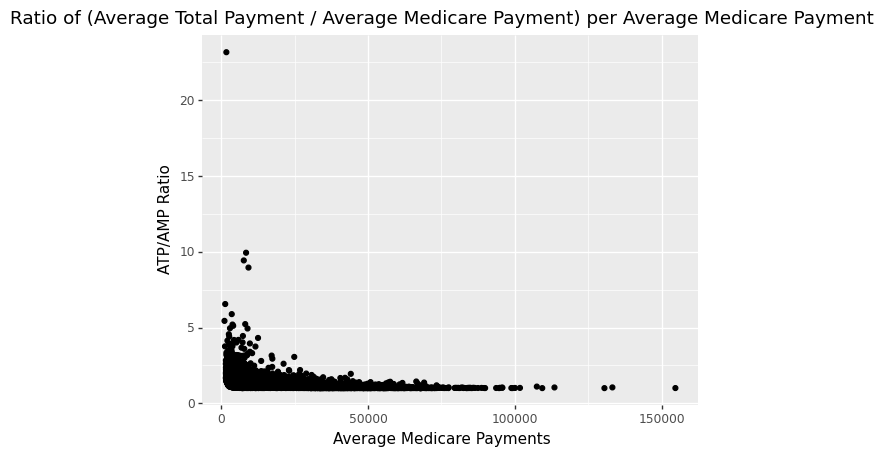

<ggplot: (-9223372036523993165)>

In [22]:
ggplot(hospital_charge, aes(x= 'Average Medicare Payments' ,y='Total/Medicare' )) + geom_point() \
    + labs(title = "Ratio of (Average Total Payment / Average Medicare Payment) per Average Medicare Payment", y = "ATP/AMP Ratio")

Looks like there are actually 4 points worth looking at: all on the left hand side, 1 high up on the y axis and 3 near y = 10.

In [23]:
hospital_charge.sort_values(by=['Total/Medicare']).tail(4)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total/Medicare
47957,247 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,430095,AVERA HEART HOSPITAL OF SOUTH DAKOTA LLC,4500 W 69TH ST,SIOUX FALLS,SD,57108,SD - Sioux Falls,121,43844.23,83484.14,9316.11,8.961266
20388,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,390096,ST JOSEPH MEDICAL CENTER,2500 BERNVILLE ROAD,READING,PA,19605,PA - Reading,143,24542.94,72797.93,7718.09,9.432117
49145,249 - PERC CARDIOVASC PROC W NON-DRUG-ELUTING ...,500051,OVERLAKE HOSPITAL MEDICAL CENTER,1035-116TH AVE NE,BELLEVUE,WA,98004,WA - Seattle,23,44499.00,84499.26,8500.60,9.940388
38923,203 - BRONCHITIS & ASTHMA W/O CC/MCC,220008,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,2703,RI - Providence,11,7965.18,41482.09,1790.18,23.172022


All of these seem to be regarding respiratory or cardiovascular services. Note that while 38923 had 1/2 total average payment value compared to the rest, the average medicare payments covered only 1/20 of ATP, while the average covered charges is also only 1/5 of ATP.

None of these results are in highly populated areas like before. This is probably due to the fact that we are not looking at the highest ATP or AMP, but the ATP/AMP ratio (outliers on the y-axis). Due to the small population and thus small sample sizes, maybe looking at these outliers is not a good idea. Let's look at the outliers on the other end next: high average medicare payments and low ATP/AMP ratio:

In [24]:
hospital_charge.sort_values(by=['Average Medicare Payments']).tail(4)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total/Medicare
39529,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50195,WASHINGTON HOSPITAL,2000 MOWRY AVE,FREMONT,CA,94538,CA - Alameda County,11,918023.18,119113.00,113462.09,1.049804
109462,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,150166,PINNACLE HOSPITAL,9301 CONNECTICUT DR,CROWN POINT,IN,46307,IN - Gary,14,225729.14,131187.35,130466.57,1.005525
150793,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,330234,WESTCHESTER MEDICAL CENTER,100 WOODS RD,VALHALLA,NY,10595,NY - White Plains,15,517381.33,140255.26,133177.26,1.053147
39562,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,11,929118.90,156158.18,154620.81,1.009943


As expected, 3/4 of them are in highly dense areas. All of these have very low ATP to AMP ratios, i.e. Medicare paid for almost all charged.

I never thought I'd see Gary, Indiana topping any charts apart from crime and unemployment, yet they're #3 on the list. I can't say much about this for now without more data.

______________________________________________________________________________________________________________________


(d) Average Covered Charges vs. Average Medicare Payments

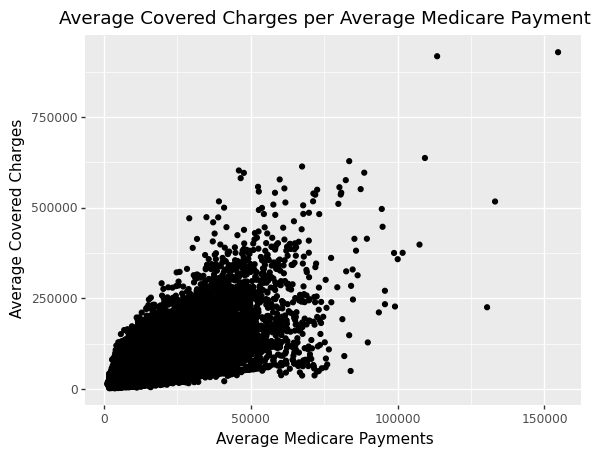

<ggplot: (311896612)>

In [25]:
ggplot(hospital_charge, aes(x= 'Average Medicare Payments' ,y=' Average Covered Charges ')) + geom_point() \
    + labs(title = "Average Covered Charges per Average Medicare Payment")

The outliers on the right side of the x-axis are the same entries that we just looked at. No surprises here.

That said, it's worth noting that Gary, IN had a very low Average Covered Charges per Average Medicare Payments compared to the rest of the outliers mentioned. Who knew?

In [26]:
hospital_charge.sort_values(by=['Average Medicare Payments']).tail(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total/Medicare
151394,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,14,637377.71,109945.57,109303.21,1.005877
39529,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50195,WASHINGTON HOSPITAL,2000 MOWRY AVE,FREMONT,CA,94538,CA - Alameda County,11,918023.18,119113.00,113462.09,1.049804
109462,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,150166,PINNACLE HOSPITAL,9301 CONNECTICUT DR,CROWN POINT,IN,46307,IN - Gary,14,225729.14,131187.35,130466.57,1.005525
150793,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,330234,WESTCHESTER MEDICAL CENTER,100 WOODS RD,VALHALLA,NY,10595,NY - White Plains,15,517381.33,140255.26,133177.26,1.053147
39562,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,11,929118.90,156158.18,154620.81,1.009943


Let's look at the values by ratio again, colored by State:

In [27]:
hospital_charge['CoveredCharges/Medicare'] = hospital_charge[' Average Covered Charges '] / hospital_charge['Average Medicare Payments'] 

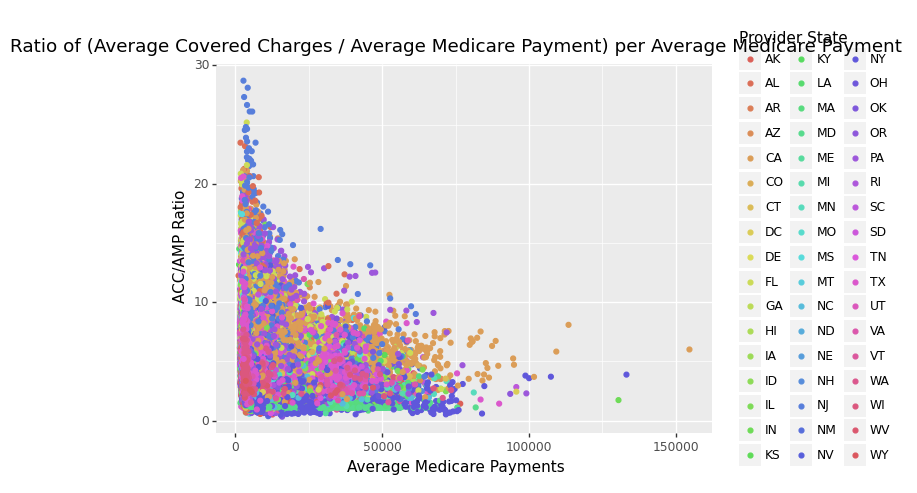

<ggplot: (-9223372036546992850)>

In [28]:
ggplot(hospital_charge, aes(x= 'Average Medicare Payments' ,y='CoveredCharges/Medicare', color = "Provider State")) + geom_point() \
    + labs(title = "Ratio of (Average Covered Charges / Average Medicare Payment) per Average Medicare Payment", y = "ACC/AMP Ratio" )

Most of the ones on the high end of the ratios (y-axis) are from Bayonne, New Jersey. The city is basically a small strip of New York City right off Manhattan. Maybe their state's Provider Fee Schedule rules for Medicare services are less generous than New York's? Cellulitis also might not be a covered charge, since it may not be considered a "medical necessity"?

Based on the graph above, though, CA is definitely more consistent in having higher ACC/AMP ratios, while Indiana's is on the low end.

In [29]:
hospital_charge.sort_values(by=['CoveredCharges/Medicare']).tail(20)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Total/Medicare,CoveredCharges/Medicare
126339,603 - CELLULITIS W/O MCC,310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,87,105756.27,5807.05,4781.10,1.214585,22.119652
36005,195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC,310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,25,88520.52,4919.36,3978.72,1.236418,22.248492
132781,"641 - MISC DISORDERS OF NUTRITION,METABOLISM,F...",310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,30,91222.20,4764.40,4014.00,1.186946,22.726009
1767,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,13,128464.69,6503.30,5644.84,1.152079,22.757897
57255,"282 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ...",310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,16,107981.25,5537.75,4692.75,1.180065,23.010229
9992,074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O...,10139,BROOKWOOD MEDICAL CENTER,2010 BROOKWOOD MEDICAL CENTER DRIVE,BIRMINGHAM,AL,35209,AL - Birmingham,26,77613.11,4753.26,3347.50,1.419943,23.185395
38567,203 - BRONCHITIS & ASTHMA W/O CC/MCC,10139,BROOKWOOD MEDICAL CENTER,2010 BROOKWOOD MEDICAL CENTER DRIVE,BIRMINGHAM,AL,35209,AL - Birmingham,23,42618.56,3551.39,1815.30,1.956365,23.477420
5247,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,24,162922.50,18080.41,6938.50,2.605810,23.480940
103375,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",310025,BAYONNE HOSPITAL CENTER,29 EAST 29TH ST,BAYONNE,NJ,7002,NJ - Newark,52,96216.73,7026.38,4080.03,1.722139,23.582358
148880,812 - RED BLOOD CELL DISORDERS W/O MCC,310021,ST FRANCIS MEDICAL CENTER,601 HAMILTON AVE,TRENTON,NJ,8629,PA - Philadelphia,11,87934.54,7076.18,3679.63,1.923068,23.897658


______________________________________________________________________________________________________________________

Transforming Data

There are 100 values of DRG Definition. Construct 100 DRG Charges features, one for each unique value of DRG Definition. The feature should record the Average Covered Charges for the specified DRG category. Then construct a transformed version of the data that only includes the provider id, provider state, and the 100 new DRG Charges features.

For example, the data should look like the format in the table below. Make sure to include missing values for any provider that doesn’t have a charge for a specific DRG.


In [30]:
DRG_pivot = pd.pivot_table(hospital_charge,index=["Provider Id","Provider State"],values=[" Average Covered Charges "],
               columns=["DRG Definition"])
DRG_pivot

Average Covered Charges   \
DRG Definition             039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
Provider Id Provider State                                            
10001       AL                                             32963.07   
10005       AL                                             15131.85   
10006       AL                                             37560.37   
10007       AL                                                  NaN   
10008       AL                                                  NaN   
...                                                             ...   
670072      TX                                                  NaN   
670073      TX                                                  NaN   
670075      TX                                                  NaN   
670076      TX                                                  NaN   
670077      TX                                                  NaN   

                                                                                \
DRG Definition             057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC   
Provider Id Provider State                                                       
10001       AL                                                       20312.78    
10005       AL                                                            NaN    
10006       AL                                                            NaN    
10007       AL                                                            NaN    
10008       AL                                                            NaN    
...                                                                       ...    
670072      TX                                                            NaN    
670073      TX                                                            NaN    
670075      TX                                                            NaN    
670076      TX                                                            NaN    
670077      TX                                                            NaN    

                                                                                       \
DRG Definition             064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC   
Provider Id Provider State                                                              
10001       AL                                                       38820.39           
10005       AL                                                       22946.38           
10006       AL                                                       45393.21           
10007       AL                                                            NaN           
10008       AL                                                            NaN           
...                                                                       ...           
670072      TX                                                            NaN           
670073      TX                                                            NaN           
670075      TX                                                            NaN           
670076      TX                                                            NaN           
670077      TX                                                            NaN           

                                                                                      \
DRG Definition             065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC   
Provider Id Provider State                                                             
10001       AL                                                       27345.10          
10005       AL                                                       16930.43          
10006       AL                                                       27320.14          
10007       AL                                                            NaN          
10008       AL                      

______________________________________________________________________________________________________________________

Correlation and Scatterplots

On the new transformed version of the data, explore the relationships among the 100 DRG Charges features. Identify two pairs of DRG Charges features with high positive associations and two pairs with low positive associations. For each of the four pairs of features:

(a) Plot scatterplots. Plot a scatterplot to show their relationship. Make sure to label both axis of the plot with the feature names. Discuss whether the observed relations are interesting or expected, given the DRG category names. (This will result in 4 scatter plots total.)

Let's put all these DRGs in boxplots to see if we can find any visual cues of similiarities:

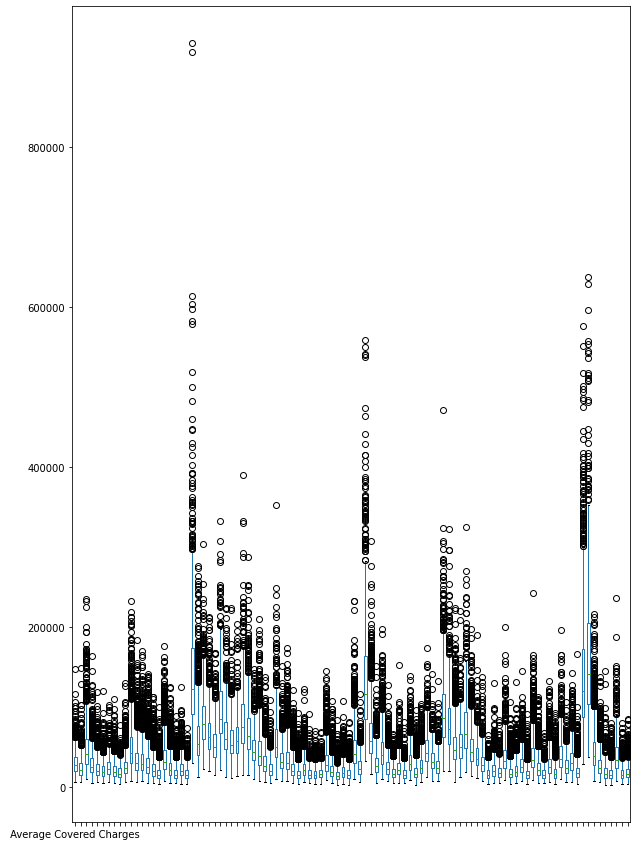

In [31]:
DRG_pivot.boxplot(column=[' Average Covered Charges '], grid = False, figsize=(10,15))

There are too many boxes to identify them individually, but we can tell that plots with the top 4 highest values seem to look similiar. Let's sort these DRGs by their highest respective values to identify these tall boxplots:

In [32]:
DRG_pivot.max(skipna = True).sort_values(ascending=False).head(4)


                           DRG Definition                                                   
 Average Covered Charges   207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS    929118.90
                           870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS                     637377.71
                           853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC         576296.00
                           329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC                     557900.75
dtype: float64

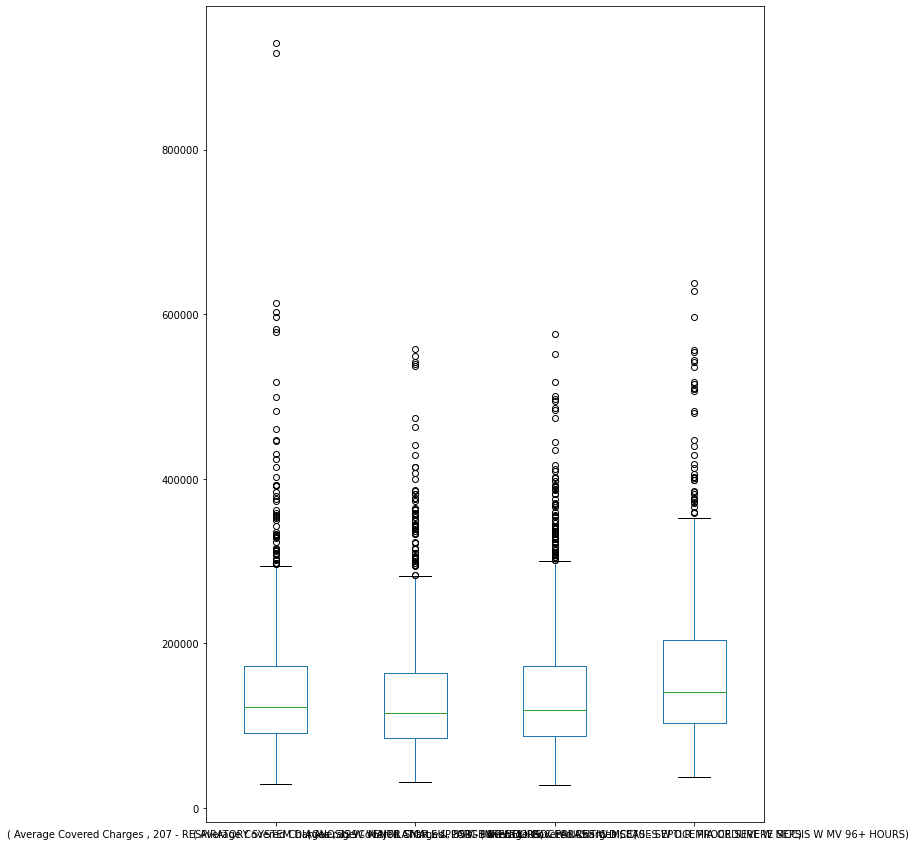

In [33]:
DRG_pivot_resetIndex = DRG_pivot.reset_index(drop = True)

DRG_pivot_resetIndex.boxplot(column=[(' Average Covered Charges ', '207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS'),\
                             (' Average Covered Charges ', '329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC'), \
                             (' Average Covered Charges ', '853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC'), \
                             (' Average Covered Charges ', '870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS')], \
                             grid = False, figsize=(10,15))

yup, they look like the culprits when put on the boxplot.

I will pair the leftmost one with the rightmost one and then the middle 2 and compare them.

In [34]:
#take sample 1 and 4 and assign their own variables for legibility
#DRG_pivot_resetIndex_fillna = DRG_pivot_resetIndex.fillna(0)
DRG870 = DRG_pivot_resetIndex[(' Average Covered Charges ', '870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS')]
DRG207 = DRG_pivot_resetIndex[(' Average Covered Charges ', '207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS')]

/Users/markjin/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2540 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


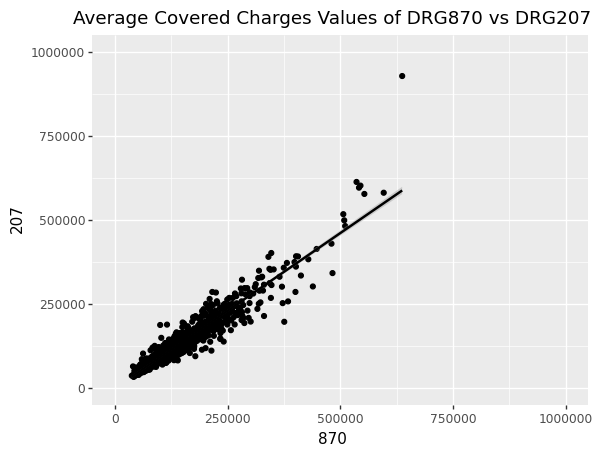

<ggplot: (-9223372036542248248)>

In [35]:
#put the samples in their own dataframe for plotting, then plot
DRG870_207 = pd.DataFrame()
DRG870_207['870'] = DRG870
DRG870_207['207'] = DRG207

ggplot(DRG870_207, aes(x='870', y='207')) + geom_point() + xlim([0,1000000]) + ylim([0,1000000])\
    + labs(title = "Average Covered Charges Values of DRG870 vs DRG207") + geom_smooth(method='lm')

Note that the data with NaN has been erased in the plot.

There seems to be a strong correlation between the 2 DRGs, as the datapoints follow the regression line.

/Users/markjin/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2178 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


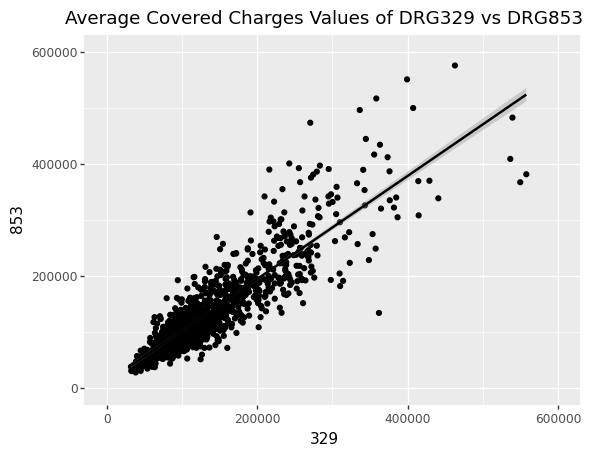

<ggplot: (-9223372036546927935)>

In [36]:
#take samples 2 and 3 and assign their own variables for legibility
DRG329 = DRG_pivot_resetIndex[(' Average Covered Charges ', '329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC')]
DRG853 = DRG_pivot_resetIndex[(' Average Covered Charges ', '853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC')]

DRG329_853 = pd.DataFrame()
DRG329_853['329'] = DRG329
DRG329_853['853'] = DRG853

ggplot(DRG329_853, aes(x='329', y='853')) + geom_point() + xlim([0,600000]) + ylim([0,600000])\
+ labs(title = "Average Covered Charges Values of DRG329 vs DRG853") + geom_smooth(method='lm')

The relationship here is still there, but note that the non-NaN datapoints are not homoscedastic.

seems to be a strong correlation between the 2 DRGs, as the datapoints follow the regression line.

Let's now look at 2 DRGs that don't seem to have high correlation. Let's compare 2 of the high paying DRGs to 2 of the lower paying DRGs. Looking at the boxplots of all the DRGs above, the first and last DRGs look quite low in comparison. Let's take those.

/Users/markjin/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2747 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


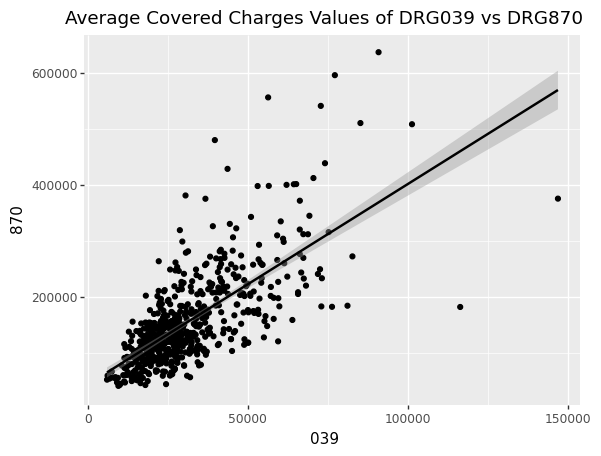

<ggplot: (307312164)>

In [37]:
DRG039 = DRG_pivot_resetIndex[(' Average Covered Charges ', '039 - EXTRACRANIAL PROCEDURES W/O CC/MCC')]

DRG039_870 = pd.DataFrame()
DRG039_870['039'] = DRG039
DRG039_870['870'] = DRG870

ggplot(DRG039_870, aes(x='039', y='870')) + geom_point() \
    + labs(title = "Average Covered Charges Values of DRG039 vs DRG870") + geom_smooth(method='lm')

Even less homoscedasity than then the previous plot, although there is still a linear relationship.

/Users/markjin/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2332 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


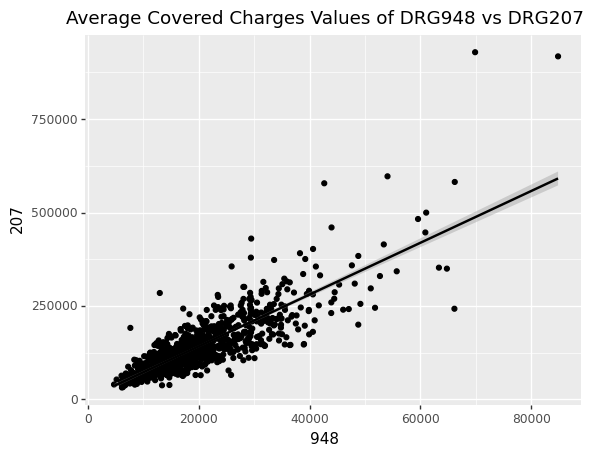

<ggplot: (307848982)>

In [38]:
DRG948 = DRG_pivot_resetIndex[(' Average Covered Charges ', '948 - SIGNS & SYMPTOMS W/O MCC')]

DRG948_207 = pd.DataFrame()
DRG948_207['948'] = DRG948
DRG948_207['207'] = DRG207

ggplot(DRG948_207, aes(x='948', y='207')) + geom_point() \
+ labs(title = "Average Covered Charges Values of DRG948 vs DRG207") + geom_smooth(method='lm')

Not as homoscedastic as I'd like, but I can't deny that this relationship looks better than the previous plot.

______________________________________________________________________________________________________________________


(b) Compute correlations. Calculate the correlation among the selected features and report. Discuss whether the correlations support your observations from the scatterplot above.

In [39]:
from scipy.stats import pearsonr
DRG870_207_dropna = DRG870_207.dropna()

corr, _ = pearsonr(DRG870_207_dropna['870'], DRG870_207_dropna['207'])
corr

0.9427118788777821

The correlation between these DRGs is very high, per our predictions.

In [40]:
DRG329_853_dropna = DRG329_853.dropna()

corr, _ = pearsonr(DRG329_853_dropna['329'], DRG329_853_dropna['853'])
corr

0.8809443277770235

correlation between these DRGs is surprisingly high, given the plot that looks like a shotgun blast. Perhaps most the plot contains so many data points in the more clustered areas that it gives the impression that there are not as many data points as it looks.

In [41]:
DRG039_870_dropna = DRG039_870.dropna()

corr, _ = pearsonr(DRG039_870_dropna['039'], DRG039_870_dropna['870'])
corr

0.6998615225260112

Correation between these 2 DRGs is lower than the previous ones, although still high, probably for the same reason I've stated before.

In [42]:
DRG948_207_dropna = DRG948_207.dropna()

corr, _ = pearsonr(DRG948_207_dropna['948'], DRG948_207_dropna['207'])
corr

0.8352109544641526

Correlation between these 2 DRGs is quite high, as expected in the plot.

______________________________________________________________________________________________________________________

Boxplots and T-tests

On the new transformed version of the data, explore how the DRG Charge features vary with Provider State.

(a) Boxplots.

• Select six states that you think may exhibit differences in their hospital charges (consider e.g., geographic, size, political differences). Find a DRG Charge feature that shows some variation across the six selected states. Plot a box plot to show the variation (i.e., the six Provider States vs. the selected DRG Charge). Make sure to label both axes of the plot with the appropriate attribute names/values.

• Select two other DRG Charge features to repeat 3(a). Make sure to use the same six selected states. (This will result in 3 box plots total.)

I want to take this opportunity to see what is going on with New Jersey, as we've noted before. In addition, I've taken New York to compare with NJ since they're neighbors, CA due to the large population, IN due to no population, TN due to southern population, and FL due to elderly population.

Let's start by looking at chest pain procedures. Older people tend to have more chest pains; maybe we can find something interesting there.

In [43]:
#build dataframe with only specific data, but columns are wrong.
DRG313 = DRG_pivot[(' Average Covered Charges ', '313 - CHEST PAIN')]
DRG313 = DRG313.reset_index()
DRG313 = DRG313.loc[(DRG313['Provider State'] == 'CA')\
                    | (DRG313['Provider State'] == 'IN')\
                    | (DRG313['Provider State'] == 'TN')\
                    | (DRG313['Provider State'] == 'NY')\
                    | (DRG313['Provider State'] == 'NJ')\
                    | (DRG313['Provider State'] == 'FL')]

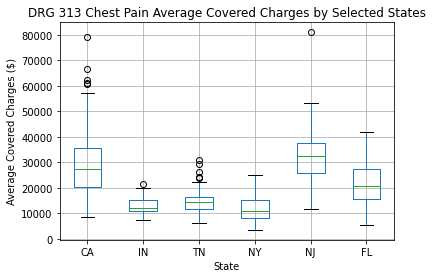

In [44]:
#build dataframe from previous df with states in columns and values as DRG313
DRG313a = pd.DataFrame()

CA = DRG313.loc[(DRG313['Provider State'] == 'CA'), (' Average Covered Charges ', '313 - CHEST PAIN')].reset_index()
del CA['index']
DRG313a['CA'] = CA.squeeze()

IN = DRG313.loc[(DRG313['Provider State'] == 'IN'), (' Average Covered Charges ', '313 - CHEST PAIN')].reset_index()
del IN['index']
DRG313a['IN'] = IN.squeeze()

TN = DRG313.loc[(DRG313['Provider State'] == 'TN'), (' Average Covered Charges ', '313 - CHEST PAIN')].reset_index()
del TN['index']
DRG313a['TN'] = TN.squeeze()

NY = DRG313.loc[(DRG313['Provider State'] == 'NY'), (' Average Covered Charges ', '313 - CHEST PAIN')].reset_index()
del NY['index']
DRG313a['NY'] = NY.squeeze()

NJ = DRG313.loc[(DRG313['Provider State'] == 'NJ'), (' Average Covered Charges ', '313 - CHEST PAIN')].reset_index()
del NJ['index']
DRG313a['NJ'] = NJ.squeeze()

FL = DRG313.loc[(DRG313['Provider State'] == 'FL'), (' Average Covered Charges ', '313 - CHEST PAIN')].reset_index()
del FL['index']
DRG313a['FL'] = FL.squeeze()

ax = DRG313a.boxplot()
title_boxplot = 'DRG 313 Chest Pain Average Covered Charges by Selected States'
plt.title( title_boxplot )
ax.set_xlabel("State")
ax.set_ylabel("Average Covered Charges ($)")
plt.show()

Let's next look at bronchitis. Everybody everywhere of all ages has bronchitis.

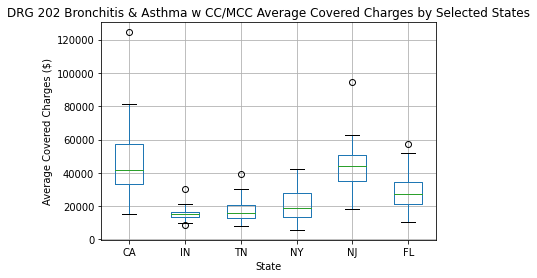

In [45]:
DRG202 = DRG_pivot[(' Average Covered Charges ', '202 - BRONCHITIS & ASTHMA W CC/MCC')]
DRG202 = DRG202.reset_index()
DRG202 = DRG202.loc[(DRG202['Provider State'] == 'CA')\
                    | (DRG202['Provider State'] == 'IN')\
                    | (DRG202['Provider State'] == 'TN')\
                    | (DRG202['Provider State'] == 'NY')\
                    | (DRG202['Provider State'] == 'NJ')\
                    | (DRG202['Provider State'] == 'FL')]

DRG202a = pd.DataFrame()

CA = DRG202.loc[(DRG202['Provider State'] == 'CA'), (' Average Covered Charges ', '202 - BRONCHITIS & ASTHMA W CC/MCC')].reset_index()
del CA['index']
DRG202a['CA'] = CA.squeeze()

IN = DRG202.loc[(DRG202['Provider State'] == 'IN'), (' Average Covered Charges ', '202 - BRONCHITIS & ASTHMA W CC/MCC')].reset_index()
del IN['index']
DRG202a['IN'] = IN.squeeze()

TN = DRG202.loc[(DRG202['Provider State'] == 'TN'), (' Average Covered Charges ', '202 - BRONCHITIS & ASTHMA W CC/MCC')].reset_index()
del TN['index']
DRG202a['TN'] = TN.squeeze()

NY = DRG202.loc[(DRG202['Provider State'] == 'NY'), (' Average Covered Charges ', '202 - BRONCHITIS & ASTHMA W CC/MCC')].reset_index()
del NY['index']
DRG202a['NY'] = NY.squeeze()

NJ = DRG202.loc[(DRG202['Provider State'] == 'NJ'), (' Average Covered Charges ', '202 - BRONCHITIS & ASTHMA W CC/MCC')].reset_index()
del NJ['index']
DRG202a['NJ'] = NJ.squeeze()

FL = DRG202.loc[(DRG202['Provider State'] == 'FL'), (' Average Covered Charges ', '202 - BRONCHITIS & ASTHMA W CC/MCC')].reset_index()
del FL['index']
DRG202a['FL'] = FL.squeeze()

ax = DRG202a.boxplot()
title_boxplot = 'DRG 202 Bronchitis & Asthma w CC/MCC Average Covered Charges by Selected States'
plt.title( title_boxplot )
ax.set_xlabel("State")
ax.set_ylabel("Average Covered Charges ($)")
plt.show()

Let's now look at alcohol/drug abuse.

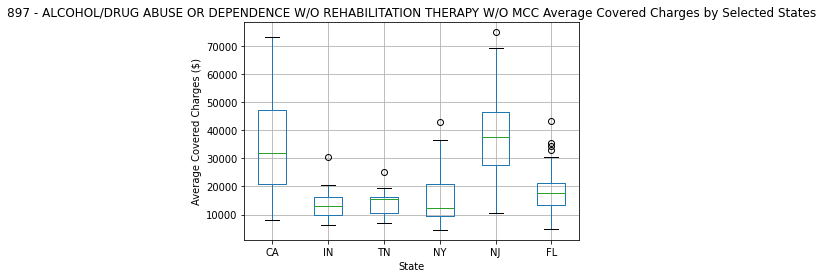

In [46]:
DRG897 = DRG_pivot[(' Average Covered Charges ', '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC')]
DRG897 = DRG897.reset_index()
DRG897 = DRG897.loc[(DRG897['Provider State'] == 'CA')\
                    | (DRG897['Provider State'] == 'IN')\
                    | (DRG897['Provider State'] == 'TN')\
                    | (DRG897['Provider State'] == 'NY')\
                    | (DRG897['Provider State'] == 'NJ')\
                    | (DRG897['Provider State'] == 'FL')]

DRG897a = pd.DataFrame()

CA = DRG897.loc[(DRG897['Provider State'] == 'CA'), (' Average Covered Charges ', '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC')].reset_index()
del CA['index']
DRG897a['CA'] = CA.squeeze()

IN = DRG897.loc[(DRG897['Provider State'] == 'IN'), (' Average Covered Charges ', '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC')].reset_index()
del IN['index']
DRG897a['IN'] = IN.squeeze()

TN = DRG897.loc[(DRG897['Provider State'] == 'TN'), (' Average Covered Charges ', '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC')].reset_index()
del TN['index']
DRG897a['TN'] = TN.squeeze()

NY = DRG897.loc[(DRG897['Provider State'] == 'NY'), (' Average Covered Charges ', '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC')].reset_index()
del NY['index']
DRG897a['NY'] = NY.squeeze()

NJ = DRG897.loc[(DRG897['Provider State'] == 'NJ'), (' Average Covered Charges ', '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC')].reset_index()
del NJ['index']
DRG897a['NJ'] = NJ.squeeze()

FL = DRG897.loc[(DRG897['Provider State'] == 'FL'), (' Average Covered Charges ', '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC')].reset_index()
del FL['index']
DRG897a['FL'] = FL.squeeze()

ax = DRG897a.boxplot()
title_boxplot = '897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC Average Covered Charges by Selected States'
plt.title( title_boxplot )
ax.set_xlabel("State")
ax.set_ylabel("Average Covered Charges ($)")
plt.show()

______________________________________________________________________________________________________________________


(b) Formulate and test claim (1).

• Based on the three box plots, identify the pair of states that you think have the most significant differences in their charges for a single DRG category. Explicitly state your hypothesis in terms of H0 and H1.

• Perform a two-sample Student’s t-test to assess your hypotheses. State whether you are performing a one-sided or two-sided test. Report the resulting t statistic and p-value. Discuss whether the results support your claim(s).


Based on the boxplots, I'm going to compare NJ with Indiana, as their respective means look very different from each other. I will choose DRG 202 Bronchitis & Asthma as their mean difference is the biggest of the 3 DRGs.

H0: The means of DRG202 for IN and NJ are the same

H1: The means of DRG202 for IN and NJ are not the same

We will be doing a 2 sided test, as we care about the relationship in both directions.

In [47]:
t,p=st.ttest_ind(DRG202a['NJ'], DRG202a['IN'], nan_policy='omit')
print((t,p))  # t: returned t-statistic value, p: calculated p-value

(11.831994266642045, 2.4467029763595665e-19)


The results look very definitive. the T-score is a whopping 11.8, which is about 11.8 times as different from each other as they are within each other. The p-value is pretty much 0, given the e-19, which indicates that there's basically 0% probability that the results happened by chance. Since this is way below the default alpha = 0.05, we can reject H0.

The result supports our claim that the means are different.

______________________________________________________________________________________________________________________


(c) Formulate and test claim.

• Based on the three box plots, identify a different pair of states that you think have a significant difference in their charges across all three selected DRG categories. Explicitly state your hypothesis in terms of H0 and H1.

• Perform a two-sample paired Student’s t-test to assess your hypotheses. To do this you will need to concatenate the values from the three selected DRG categories into a single vector, one for each state. If the samples are different sizes (e.g., each state has a different number of providers), just randomly downsample from the state with more providers to reduce it to the same size as the state with fewer providers. Report the resulting t statistic and p-value. Discuss whether the results support your claim(s).

• Repeat the test as above, but use an unpaired t-test this time. Report the differ- ences and discuss what (if any) impact there is on your assessment of significance.


Let's do TN and CA next. They look quite different as well.

H0: The means of the 3 DRGs for CA and TN are the same

H1: The means of the 3 DRGs for CA and TN are not the same

In [48]:
CAvalues = DRG313a.CA + DRG202a.CA + DRG897a.CA
CAvalues = CAvalues.dropna().tolist()
len(CAvalues)

37

In [49]:
TNvalues = DRG313a.TN + DRG202a.TN + DRG897a.TN
TNvalues = TNvalues.dropna().tolist()
len(TNvalues)

12

In [50]:
import random
CAvalues = random.choices(CAvalues, k = 12)

t,p=st.ttest_rel(CAvalues, TNvalues)
print((t,p))

(7.922723607694672, 7.162919811738911e-06)


The results are quite conclusive, as the t-score is 6 and the p-value is well less than 0.05. We thus reject H0.

In [51]:
t,p=st.ttest_ind(CAvalues, TNvalues)
print((t,p)) 

(7.814710190325516, 8.691100991585152e-08)


The results for an unpaired t-test is not very different, while p-value is still well less than 0.05. We reject H0 all the same.